In [1]:
import os
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage.transform import resize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Extract Images from DICOM Files

In [2]:
def extract_images_from_dicom(dicom_directory):
    """Extract image data from DICOM files."""
    dicom_files = [os.path.join(dicom_directory, f) for f in os.listdir(dicom_directory) if f.endswith('.dcm')]
    images = []
    for dicom_file in dicom_files:
        ds = pydicom.dcmread(dicom_file)
        images.append(ds.pixel_array)
    return images

# Feature Extraction using HOG

In [3]:
def extract_hog_features(images, resize_shape=(128, 128)):
    """Extract HOG features from a list of images."""
    hog_features = []
    for image in images:
        # Resize the image to a consistent shape
        resized_image = resize(image, resize_shape, anti_aliasing=True)
        fd, _ = hog(resized_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        hog_features.append(fd)
    return np.array(hog_features)


# Dimensionality Reduction

In [4]:
def reduce_dimensions(features):
    """Reduce dimensionality using PCA and t-SNE."""
    # Standardize the features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # PCA
    pca = PCA(n_components=0.95)
    features_pca = pca.fit_transform(features_scaled)

    # t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    features_tsne = tsne.fit_transform(features_pca)
    
    return features_tsne

# Clustering using K-Means

In [5]:
def cluster_images(features, n_clusters=4):
    """Cluster images based on extracted features using K-Means."""
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=42)
    labels = kmeans.fit_predict(features)
    return labels

# Visualization of Clusters

In [6]:
def visualize_clusters(images, labels, n_clusters=4):
    """Visualize images in their respective clusters."""
    for cluster in range(n_clusters):
        cluster_images = [images[i] for i in range(len(images)) if labels[i] == cluster]
        fig, axarr = plt.subplots(1, len(cluster_images), figsize=(20, 5))
        for i, img in enumerate(cluster_images):
            axarr[i].imshow(img, cmap='gray')
            axarr[i].axis('off')
        plt.suptitle(f"Cluster {cluster + 1}")
        plt.show()

# Silhouette Score

In [7]:
def evaluate_silhouette_score(features, labels):
    score = silhouette_score(features, labels)
    return score

Silhouette Score: 0.449


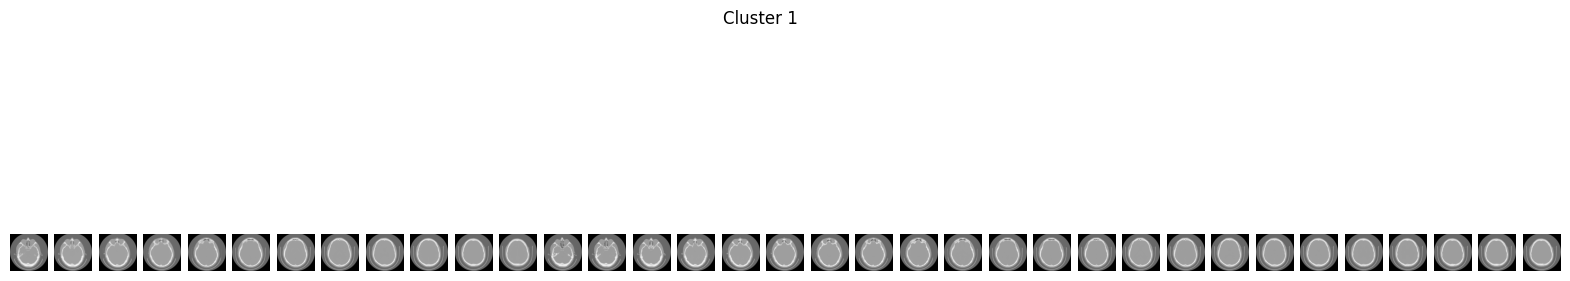

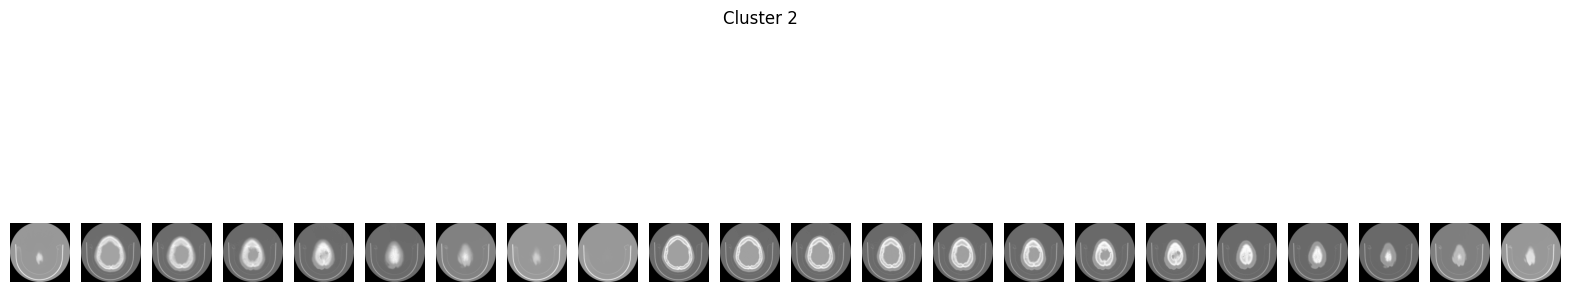

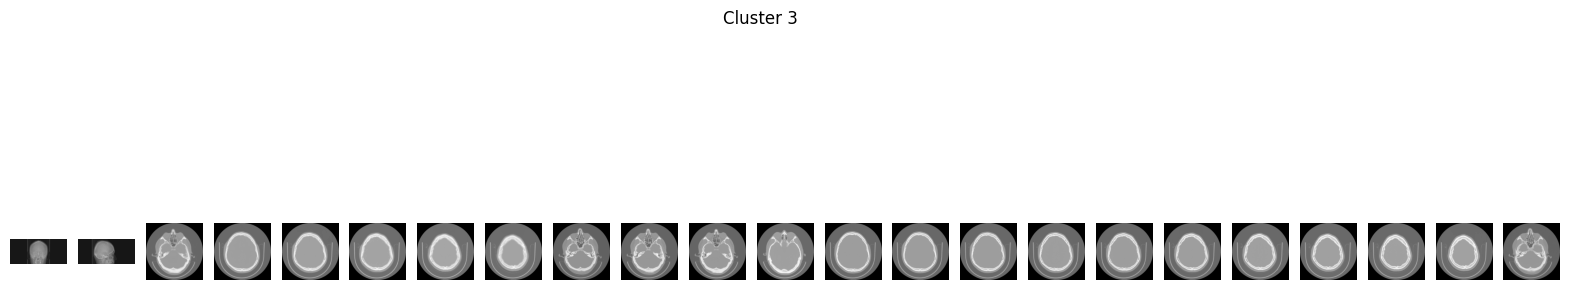

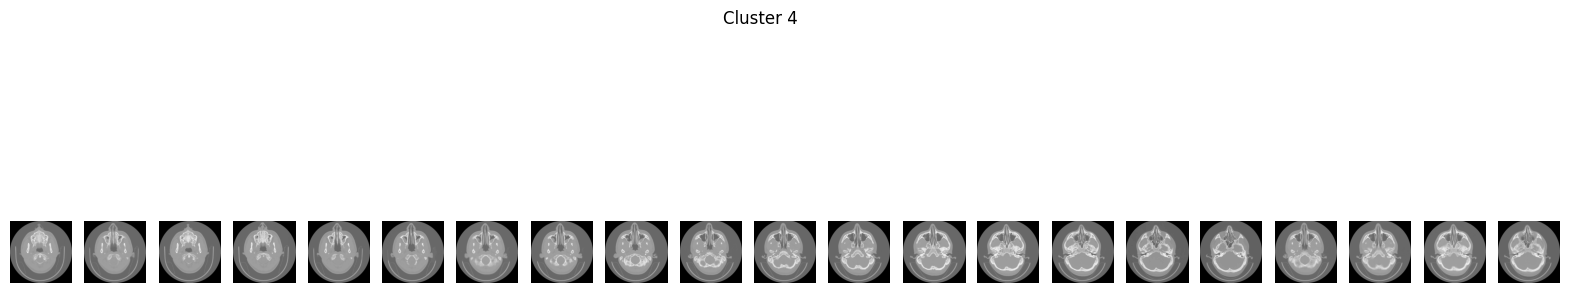

In [8]:
dicom_directory = r"C:\Users\chira\Desktop\Origin\data-operations_role-challenge-2_DICOM-processing-analysis-20240808T052806Z-001 (2)\data-operations_role-challenge-2_DICOM-processing-analysis\assets\dicom-dataset"
images = extract_images_from_dicom(dicom_directory)
hog_features = extract_hog_features(images)
features_tsne = reduce_dimensions(hog_features)
labels = cluster_images(features_tsne, n_clusters=4)
silhouette_score_value = evaluate_silhouette_score(features_tsne, labels)
print(f"Silhouette Score: {silhouette_score_value:.3f}")
visualize_clusters(images, labels, n_clusters=4)